# CrossCorrelation

This Tutorial is intended to give a demostration of How to make a CrossCorrelation Object in Stingray Library.

In [1]:
import numpy as np
from stingray import Lightcurve
from stingray.crosscorrelation import CrossCorrelation

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
font_prop = font_manager.FontProperties(size=16)

/home/theswapsha96/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# CrossCorrelation Example


# 1. Create two light curves

There are two ways to create a Lightcurve.<br>
1) Using an array of time stamps and an array of counts.<br>
2) From the Photon Arrival times.

In this example, Lightcurve is created using arrays of time stamps and counts.

Generate an array of relative timestamps that's 10 seconds long, with dt = 0.03125 s, and make two signals in units of counts. The signal is a sine wave with amplitude = 300 cts/s, frequency = 2 Hz, phase offset of pi/2 radians, and mean = 1000 cts/s. We then add Poisson noise to the light curve.

In [2]:
dt = 0.03125  # seconds
exposure = 10.  # seconds
freq = 1   # Hz
times = np.arange(0, exposure, dt)  # seconds

signal_1 = 300 * np.sin(2.*np.pi*freq*times) + 1000  # counts/s
signal_2 = 300 * np.sin(2.*np.pi*freq*times + np.pi/2) + 1000  # counts/s
noisy_1 = np.random.poisson(signal_1*dt)  # counts
noisy_2 = np.random.poisson(signal_2*dt)  # counts

Now let's turn noisy_1 and noisy_2 into Lightcurve objects. This way we have two Lightcurves to calculate CrossCorrelation.

In [3]:
lc1 = Lightcurve(times, noisy_1)
lc2 = Lightcurve(times, noisy_2)

len(lc1)

320

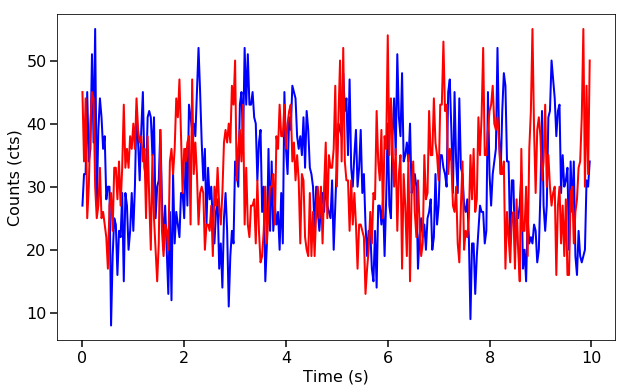

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(lc1.time, lc1.counts, lw=2, color='blue')
ax.plot(lc1.time, lc2.counts, lw=2, color='red')
ax.set_xlabel("Time (s)", fontproperties=font_prop)
ax.set_ylabel("Counts (cts)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)
plt.show()

# 2. Create a CrossCorrelation Object from two Light curves created above

To create a CrossCorrelation Object from LightCurves, simply pass both Lightvurves created above into the CrossCorrelation.

In [5]:
cr = CrossCorrelation(lc1, lc2)

Now, Cross Correlation values are stored in attribute corr, which is called below. 

In [6]:
cr.corr[:10]

array([ 114.8515625 , 1609.60698242, 3141.08740234, 3340.31157227,
       5951.79511719, 6201.02866211, 7692.09970703, 7888.71450195,
       7347.46054688, 7964.5472168 ])

In [7]:
# Time Resolution for Cross Correlation is same as that of each of the Lightcurves
cr.dt

0.03125

# 3. Plot Cross Correlation for Different lags

To visulaize correlation for different values of time lags, simply call plot function on cs.

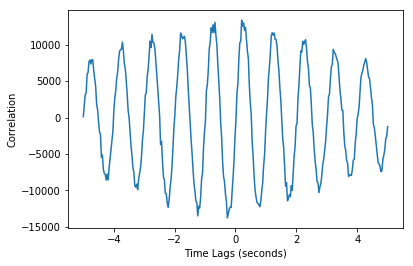

In [8]:
cr.plot(labels = ['Time Lags (seconds)','Correlation'])

Given the Phase offset of pi/2 between two lightcurves created above, and freq=1 Hz, `time_shift` should be close to 0.25 sec. Small error is due to time resolution.

In [9]:
cr.time_shift #seconds

0.2037617554858926

## Modes of Correlation

You can also specify an optional argument on modes of cross-correlation. <br>
There are three modes : 1) same   2) valid   3) full 

Visit following ink on more details on mode : https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate.html

Default mode is 'same' and it gives output equal to the size of larger lightcurve and is most common in astronomy. You can see mode of your CrossCorrelation by calling mode attribute on the object.

In [10]:
cr.mode

'same'

The number of data points in corr and largest lightcurve are same in this mode.

In [11]:
cr.n

320

Creating CrossCorrelation with full mode now using same data as above.

In [12]:
cr1 = CrossCorrelation(lc1, lc2, mode = 'full') 

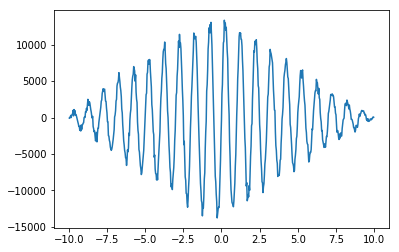

In [13]:
cr1.plot()

In [14]:
cr1.mode

'full'

Full mode does a full cross-correlation.

In [ ]:
cr1.n

639

## Another Example

You can also create CrossCorrelation Object by using Cross Correlation data. This can be useful in some cases when you have correlation data and want to calculate time shift for max. correlation. You need to specify time resolution for correlation(default value of 1.0 seconds is used otherwise).

In [ ]:
cs = CrossCorrelation()
cs.corr = np.array([ 660,  1790,  3026,  4019,  5164,  6647,  8105,  7023, 6012, 5162])
time_shift, time_lags, n = cs.cal_timeshift(dt=0.5)

In [ ]:
time_shift

In [ ]:
cs.plot( ['Time Lags (seconds)','Correlation'])

## Yet another Example with longer light curve

I will be using same lightcurves as in the example above but with much longer duration and shorter lags.<br>
Both Lightcurves are chosen to be more or less same with a certain phase shift to demonstrate Correlation in a better way.

Again Generating two signals this time without poission noise so that time lag can be demonstrated. For noisy lightcurves, accurate calculation requires interpolation.

In [ ]:
dt = 0.0001  # seconds
exposure = 50.  # seconds
freq = 1       # Hz
times = np.arange(0, exposure, dt)  # seconds

signal_1 = 300 * np.sin(2.*np.pi*freq*times) + 1000 * dt # counts/s
signal_2 = 200 * np.sin(2.*np.pi*freq*times + np.pi/2) + 900 * dt  # counts/s

Converting noisy signals into Lightcurves.

In [ ]:
lc1 = Lightcurve(times, signal_1)
lc2 = Lightcurve(times, signal_2)

len(lc1)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(lc1.time, lc1.counts, lw=2, color='blue')
ax.plot(lc1.time, lc2.counts, lw=2, color='red')
ax.set_xlabel("Time (s)", fontproperties=font_prop)
ax.set_ylabel("Counts (cts)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(which='major', width=1.5, length=7)
ax.tick_params(which='minor', width=1.5, length=4)
plt.show()

Now, creating CrossCorrelation Object by passing lc1 and lc2 into the constructor.

In [ ]:
cs = CrossCorrelation(lc1, lc2)
print('Done')

In [ ]:
cs.corr[:50]

In [ ]:
# Time Resolution for Cross Correlation is same as that of each of the Lightcurves
cs.dt

In [ ]:
cs.plot( ['Time Lags (seconds)','Correlation'])

In [ ]:
cs.time_shift #seconds

`time_shift` is very close to 0.25 sec, in this case.

## AutoCorrelation

Stingray has also separate class for AutoCorrelation. AutoCorrealtion is similar to crosscorrelation but involves only One Lightcurve.i.e. Correlation of Lightcurve with itself.

AutoCorrelation is part of `stingray.crosscorrelation` module. Following line imports AutoCorrelation.

In [ ]:
from stingray.crosscorrelation import AutoCorrelation

To create `AutoCorrelation` object, simply pass lightcurve into AutoCorrelation Constructor.<br> Using same Lighrcurve created above to demonstrate `AutoCorrelation`.

In [ ]:
lc = lc1

In [ ]:
ac = AutoCorrelation(lc)
ac.n

In [ ]:
ac.corr[:10]

In [ ]:
ac.time_lags

`time_Shift` for `AutoCorrelation` is always zero. Since signals are maximally correlated at zero lag.

In [ ]:
ac.time_shift

In [ ]:
ac.plot()

# Another Example

Another example is demonstrated using a `Lightcurve` with Poisson Noise.

In [ ]:
dt = 0.001  # seconds
exposure = 20.  # seconds
freq = 1   # Hz
times = np.arange(0, exposure, dt)  # seconds

signal_1 = 300 * np.sin(2.*np.pi*freq*times) + 1000  # counts/s
noisy_1 = np.random.poisson(signal_1*dt)  # counts
lc = Lightcurve(times, noisy_1)

`AutoCorrelation` also supports `{full,same,valid}` modes similar to `CrossCorrelation`

In [ ]:
ac = AutoCorrelation(lc, mode = 'full')

In [ ]:
ac.corr

In [ ]:
ac.time_lags

In [ ]:
ac.time_shift

In [ ]:
ac.plot()